In [1]:
from timeit import default_timer as timer
import pandas as pd
import scipy.stats
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
start_time = timer()

In [2]:
data=pd.read_csv('card transactions.csv')

In [7]:
data.shape

(96753, 10)

In [8]:
data.head(10)

Recnum     Cardnum       Date       Merchnum        Merch description  \
0       1  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1       2  5142183973 2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2       3  5142131721 2006-01-01  4503082993600        OFFICE DEPOT #191   
3       4  5142148452 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4       5  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
5       6  5142149874 2006-01-01  5509006296254   FEDEX SHP 12/22/09 AB#   
6       7  5142189277 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
7       8  5142191182 2006-01-01  6098208200062    MIAMI COMPUTER SUPPLY   
8       9  5142258629 2006-01-01   602608969534           FISHER SCI ATL   
9      10  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   

  Merch state  Merch zip Transtype  Amount  Fraud  
0          TN    38118.0         P    3.62      0  
1          MA     1803.0         P   31.42      0  
2          MD    20706.0         P  178.49      0  
3          TN    38118.0         P    3.62      0  
4          TN    38118.0         P    3.62      0  
5          TN    38118.0         P    3.67      0  
6          TN    38118.0         P    3.62      0  
7          OH    45429.0         P  230.32      0  
8          GA    30091.0         P   62.11      0  
9          TN    38118.0         P    3.62      0

In [9]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [10]:
time_data=pd.to_datetime(data["Date"],format='%Y-%m-%d')
data["Date"]=time_data

In [11]:
data.dtypes

Recnum                        int64
Cardnum                       int64
Date                 datetime64[ns]
Merchnum                     object
Merch description            object
Merch state                  object
Merch zip                   float64
Transtype                    object
Amount                      float64
Fraud                         int64
dtype: object

In [12]:
data.head(5)

Recnum     Cardnum       Date       Merchnum        Merch description  \
0       1  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   
1       2  5142183973 2006-01-01    61003026333  SERVICE MERCHANDISE #81   
2       3  5142131721 2006-01-01  4503082993600        OFFICE DEPOT #191   
3       4  5142148452 2006-01-01  5509006296254   FEDEX SHP 12/28/09 AB#   
4       5  5142190439 2006-01-01  5509006296254   FEDEX SHP 12/23/09 AB#   

  Merch state  Merch zip Transtype  Amount  Fraud  
0          TN    38118.0         P    3.62      0  
1          MA     1803.0         P   31.42      0  
2          MD    20706.0         P  178.49      0  
3          TN    38118.0         P    3.62      0  
4          TN    38118.0         P    3.62      0

In [13]:
data.tail(5)

Recnum     Cardnum       Date       Merchnum       Merch description  \
96748   96749  5142276053 2006-12-31  3500000006160  BEST BUY      00001610   
96749   96750  5142225701 2006-12-31  8090710030950  MARKUS OFFICE SUPPLIES   
96750   96751  5142226486 2006-12-31  4503057341100           TECH PAC, INC   
96751   96752  5142244619 2006-12-31  8834000695412                 BUY.COM   
96752   96753  5142243247 2006-12-31  9108347680006   STAPLES NATIONAL #471   

      Merch state  Merch zip Transtype   Amount  Fraud  
96748          KY    41042.0         P    84.79      0  
96749          OH    45248.0         P   118.75      0  
96750          OH    45150.0         P   363.56      0  
96751          CA    92656.0         P  2202.03      0  
96752          NJ     7606.0         P   554.64      0

In [14]:
data.describe()

Recnum       Cardnum     Merch zip        Amount         Fraud
count  96753.000000  9.675300e+04  92097.000000  9.675300e+04  96753.000000
mean   48377.000000  5.142202e+09  44706.596740  4.278857e+02      0.010945
std    27930.329635  5.567084e+04  28369.537945  1.000614e+04      0.104047
min        1.000000  5.142110e+09      1.000000  1.000000e-02      0.000000
25%    24189.000000  5.142152e+09  20855.000000  3.348000e+01      0.000000
50%    48377.000000  5.142196e+09  38118.000000  1.379800e+02      0.000000
75%    72565.000000  5.142246e+09  63103.000000  4.282000e+02      0.000000
max    96753.000000  5.142847e+09  99999.000000  3.102046e+06      1.000000

In [15]:
data.count()

Recnum               96753
Cardnum              96753
Date                 96753
Merchnum             93378
Merch description    96753
Merch state          95558
Merch zip            92097
Transtype            96753
Amount               96753
Fraud                96753
dtype: int64

In [16]:
data['Fraud'].sum()

1059

In [17]:
print(len(data[data['Fraud']==0]))

95694


In [18]:
print(len(data[data['Fraud'] == 0]) + len(data[data['Fraud'] != 0]))

96753


In [19]:
goods=data[data['Fraud']==0]
bads=data[data['Fraud']==1]

In [20]:
numrecords=len(data)
print(numrecords)

96753


In [21]:
print(len(goods))

95694


In [22]:
print(len(bads))

1059


In [23]:
len(data['Recnum'].unique())

96753

In [24]:
len(data['Recnum'])*100/numrecords

100.0

In [25]:
len(data['Date'])*100/numrecords

100.0

In [26]:
len(data['Date'].unique())

365

In [27]:
count_day=data.groupby('Date').count()
count_day.head(10)

Recnum  Cardnum  Merchnum  Merch description  Merch state  \
Date                                                                    
2006-01-01      51       51        51                 51           51   
2006-01-02      29       29        29                 29           29   
2006-01-03     159      159       153                159          157   
2006-01-04     229      229       221                229          226   
2006-01-05     309      309       286                309          299   
2006-01-06     330      330       317                330          328   
2006-01-07     307      307       292                307          305   
2006-01-08     104      104       104                104          104   
2006-01-09      19       19        19                 19           19   
2006-01-10     323      323       307                323          314   

            Merch zip  Transtype  Amount  Fraud  
Date                                             
2006-01-01         51         51      51     51  
2006-01-02         10         29      29     29  
2006-01-03        153        159     159    159  
2006-01-04        221        229     229    229  
2006-01-05        297        309     309    309  
2006-01-06        321        330     330    330  
2006-01-07        294        307     307    307  
2006-01-08        104        104     104    104  
2006-01-09         19         19      19     19  
2006-01-10        309        323     323    323

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

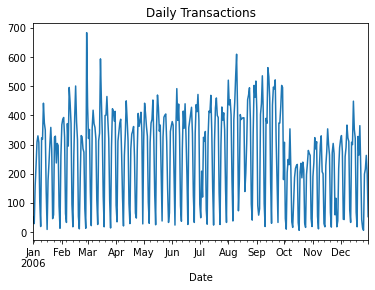

In [28]:
daily_count = data.assign(apps = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 1))\
    .count().apps
daily_count.plot(title = 'Daily Transactions')

In [29]:
daily_count.head(70)

Date
2006-01-01     51
2006-01-02     29
2006-01-03    159
2006-01-04    229
2006-01-05    309
             ... 
2006-03-07    418
2006-03-08    372
2006-03-09    359
2006-03-10    320
2006-03-11    113
Freq: D, Name: apps, Length: 70, dtype: int64

In [30]:
daily_count['2006-02-29']=daily_count['2006-02-28']

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

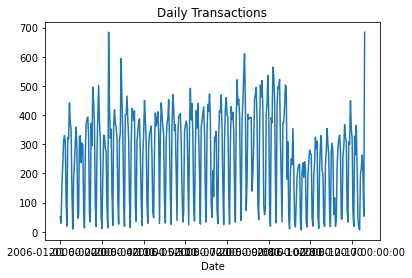

In [31]:
daily_count.plot(title='Daily Transactions')

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

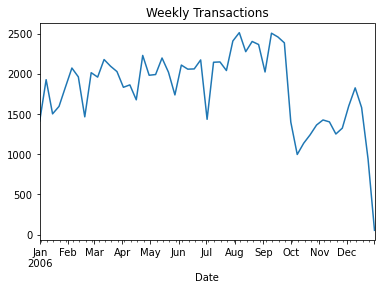

In [32]:
daily_count2 = data.assign(apps = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 7))\
    .count().apps
daily_count2.plot(title = 'Weekly Transactions')

<AxesSubplot:title={'center':'Approximately Monthly Transactions'}, xlabel='Date'>

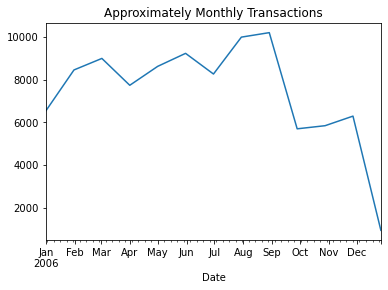

In [33]:
daily_count3 = data.assign(apps = np.ones(numrecords)).set_index(data['Date']).resample(dt.timedelta(days = 30))\
    .count().apps
daily_count3.plot(title = 'Approximately Monthly Transactions')

<AxesSubplot:title={'center':'Daily Transactions'}, xlabel='Date'>

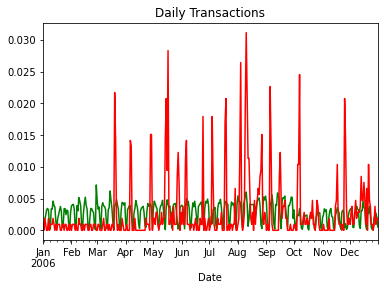

In [34]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 1)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Daily Transactions', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 1)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

<AxesSubplot:title={'center':'Weekly Transactions'}, xlabel='Date'>

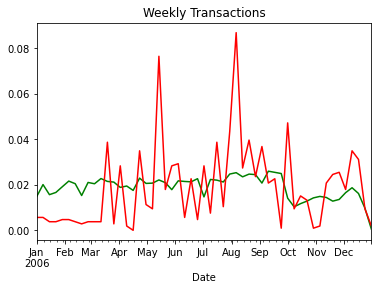

In [35]:
ngoods = len(goods)
nbads = len(bads)
goods_series = goods.assign(apps = np.ones(ngoods)).set_index(goods['Date']).resample(dt.timedelta(days = 7)).count().apps
norm_goods_series = goods_series / ngoods
norm_goods_series.plot(title = 'Weekly Transactions', color = 'green')
bads_series = bads.assign(apps = np.ones(nbads)).set_index(bads['Date']).resample(dt.timedelta(days = 7)).count().apps
norm_bads_series = bads_series / nbads
norm_bads_series.plot(color = 'red')

In [36]:
len(data['Cardnum'].unique())

1645

In [37]:
data['Cardnum'].value_counts()

5142148452    1192
5142184598     921
5142189108     663
5142297710     583
5142223373     579
              ... 
5142306704       1
5142135021       1
5142276358       1
5142142008       1
5142233066       1
Name: Cardnum, Length: 1645, dtype: int64

Text(0.5, 1.0, 'Cardnum')

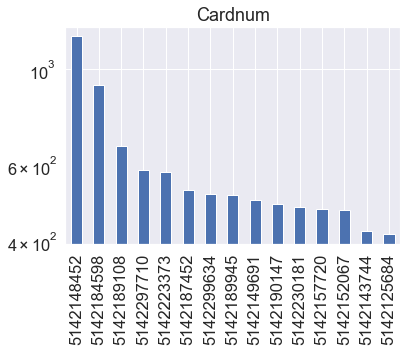

In [38]:
sns.set(font_scale=1.5)
data['Cardnum'].value_counts().head(15).plot(kind = 'bar')
plt.yscale('log')
plt.title('Cardnum')

In [39]:
len(data['Merchnum'])*100/numrecords

100.0

In [40]:
len(data['Merchnum'].unique())

13092

In [41]:
data['Merchnum'].value_counts()

930090121224     9310
5509006296254    2131
9900020006406    1714
602608969534     1092
4353000719908    1020
                 ... 
2000021670061       1
6731000199309       1
9813800006594       1
3065107420906       1
3500000006160       1
Name: Merchnum, Length: 13091, dtype: int64

Text(0.5, 1.0, 'Merchnum')

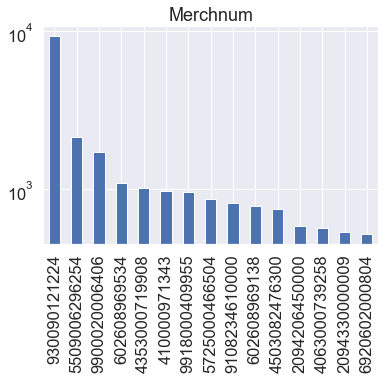

In [42]:
data['Merchnum'].value_counts().head(15).plot(kind='bar')
plt.yscale('log')
plt.title('Merchnum')

In [43]:
len(data['Merch description'])*100/numrecords

100.0

In [44]:
len(data['Merch description'].unique())

13126

In [45]:
data['Merch description'].value_counts()

GSA-FSS-ADV                 1688
SIGMA-ALDRICH               1635
STAPLES #941                1174
FISHER SCI ATL              1093
MWI*MICRO WAREHOUSE          958
                            ... 
HBD INC                        1
SALES MARKETING MAGAZINE       1
PATTERSON'S TRUE VALUE         1
FLOPPY COPY                    1
BEST BUY      00001610         1
Name: Merch description, Length: 13126, dtype: int64

Text(0.5, 1.0, 'Merch Description')

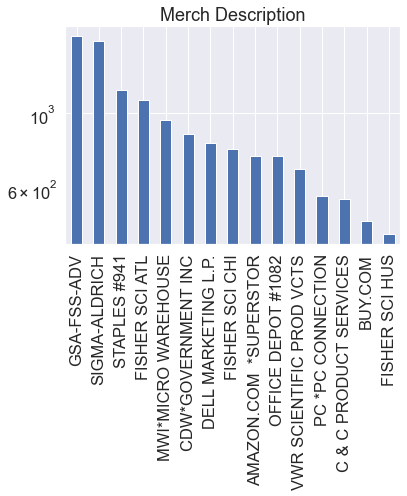

In [46]:
data['Merch description'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Merch Description')

In [47]:
len(data['Merch state'])*100/numrecords

100.0

In [48]:
len(data['Merch state'].unique())

228

In [49]:
data['Merch state'].value_counts()

TN     12035
VA      7872
CA      6817
IL      6508
MD      5398
       ...  
495        1
376        1
458        1
546        1
116        1
Name: Merch state, Length: 227, dtype: int64

Text(0.5, 1.0, 'Merch state')

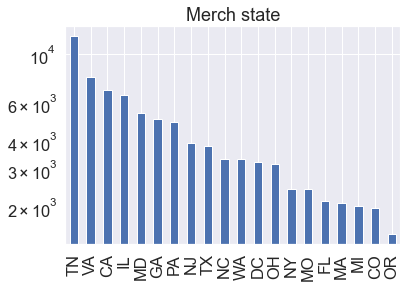

In [50]:
data['Merch state'].value_counts().head(20).plot(kind='bar',logy=True)
plt.title('Merch state')

In [59]:
len(data['Merch zip'])*100/numrecords

100.0

In [60]:
len(data['Merch zip'].unique())

4568

In [61]:
data['Merch zip'].value_counts()

38118.0    11868
63103.0     1650
8701.0      1267
22202.0     1250
60061.0     1221
           ...  
89125.0        1
46225.0        1
27025.0        1
6076.0         1
36043.0        1
Name: Merch zip, Length: 4567, dtype: int64

Text(0.5, 1.0, 'Merch zip')

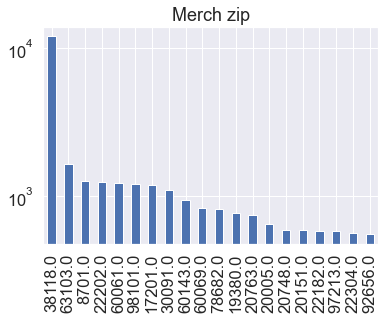

In [79]:
data['Merch zip'].value_counts().head(20).plot(kind='bar',logy=True)
plt.title('Merch zip')

In [66]:
len(data['Transtype'])*100/numrecords

100.0

In [67]:
len(data['Transtype'].unique())

4

In [68]:
data['Transtype'].value_counts()

P    96398
A      181
D      173
Y        1
Name: Transtype, dtype: int64

Text(0.5, 1.0, 'Transtype')

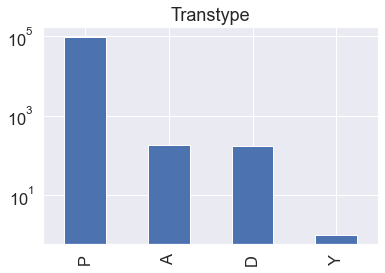

In [52]:
data['Transtype'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Transtype')

In [70]:
len(data['Amount'])*100/numrecords

100.0

In [71]:
len(data['Amount'].unique())

34909

In [72]:
data['Amount'].value_counts()

3.62       4283
3.67       1620
3.74        913
3.80        827
4.37        378
           ... 
949.29        1
2303.00       1
303.72        1
183.36        1
554.64        1
Name: Amount, Length: 34909, dtype: int64

Text(0.5, 1.0, 'Amount')

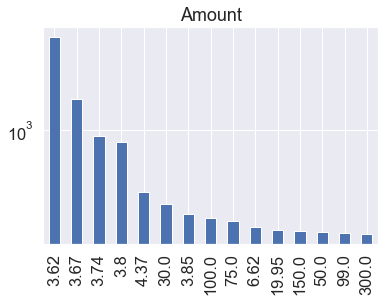

In [81]:
data['Amount'].value_counts().head(15).plot(kind='bar',logy=True)
plt.title('Amount')